In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data.astype('float32'), columns=california.feature_names)
y = california.target

# Data Check

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.880001,-122.230003
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.849998,-122.239998
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.849998,-122.250000
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000


In [4]:
def draw_histogram(x, title=None, xlabel=None):
    plt.title(title)
    plt.hist(x, color='blue', rwidth=0.9)
    plt.xlabel(xlabel)
    plt.show()

In [5]:
def draw_scatters(X, y, ncols=3):
    cols = X.columns
    fig, axs = plt.subplots(nrows=-(-len(cols)//3), ncols=ncols, figsize=(len(cols), len(cols)*1.5))
    fig.suptitle('relationship between y and X')
    
    for ax, col in zip(axs.ravel(), cols):
        ax.set_xlabel(col)
        ax.set_ylabel('y')
        ax.scatter(x=X[col], y=y, marker="o", color="brown")
    
    fig.show()

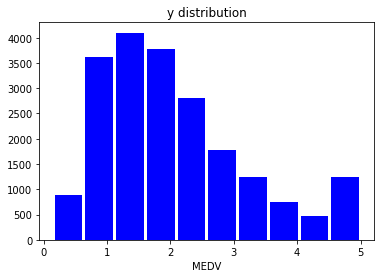

In [6]:
draw_histogram(y, title='y distribution', xlabel="MEDV")

/Users/ryotaro.shimizu/.pyenv/versions/3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


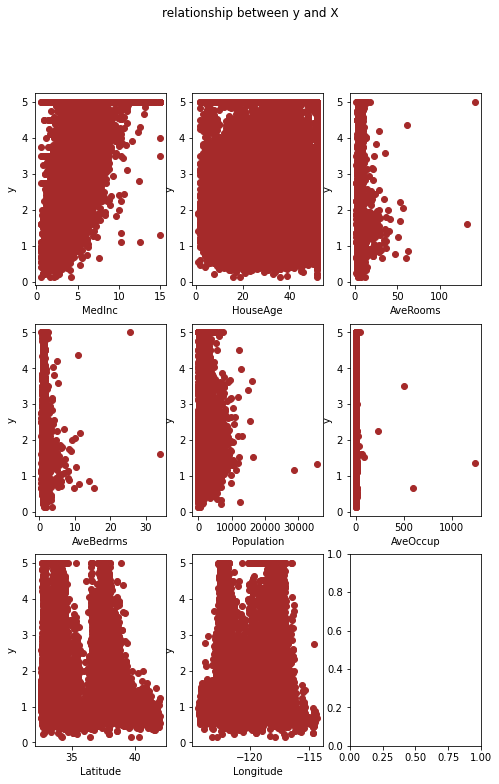

In [7]:
draw_scatters(X, y)

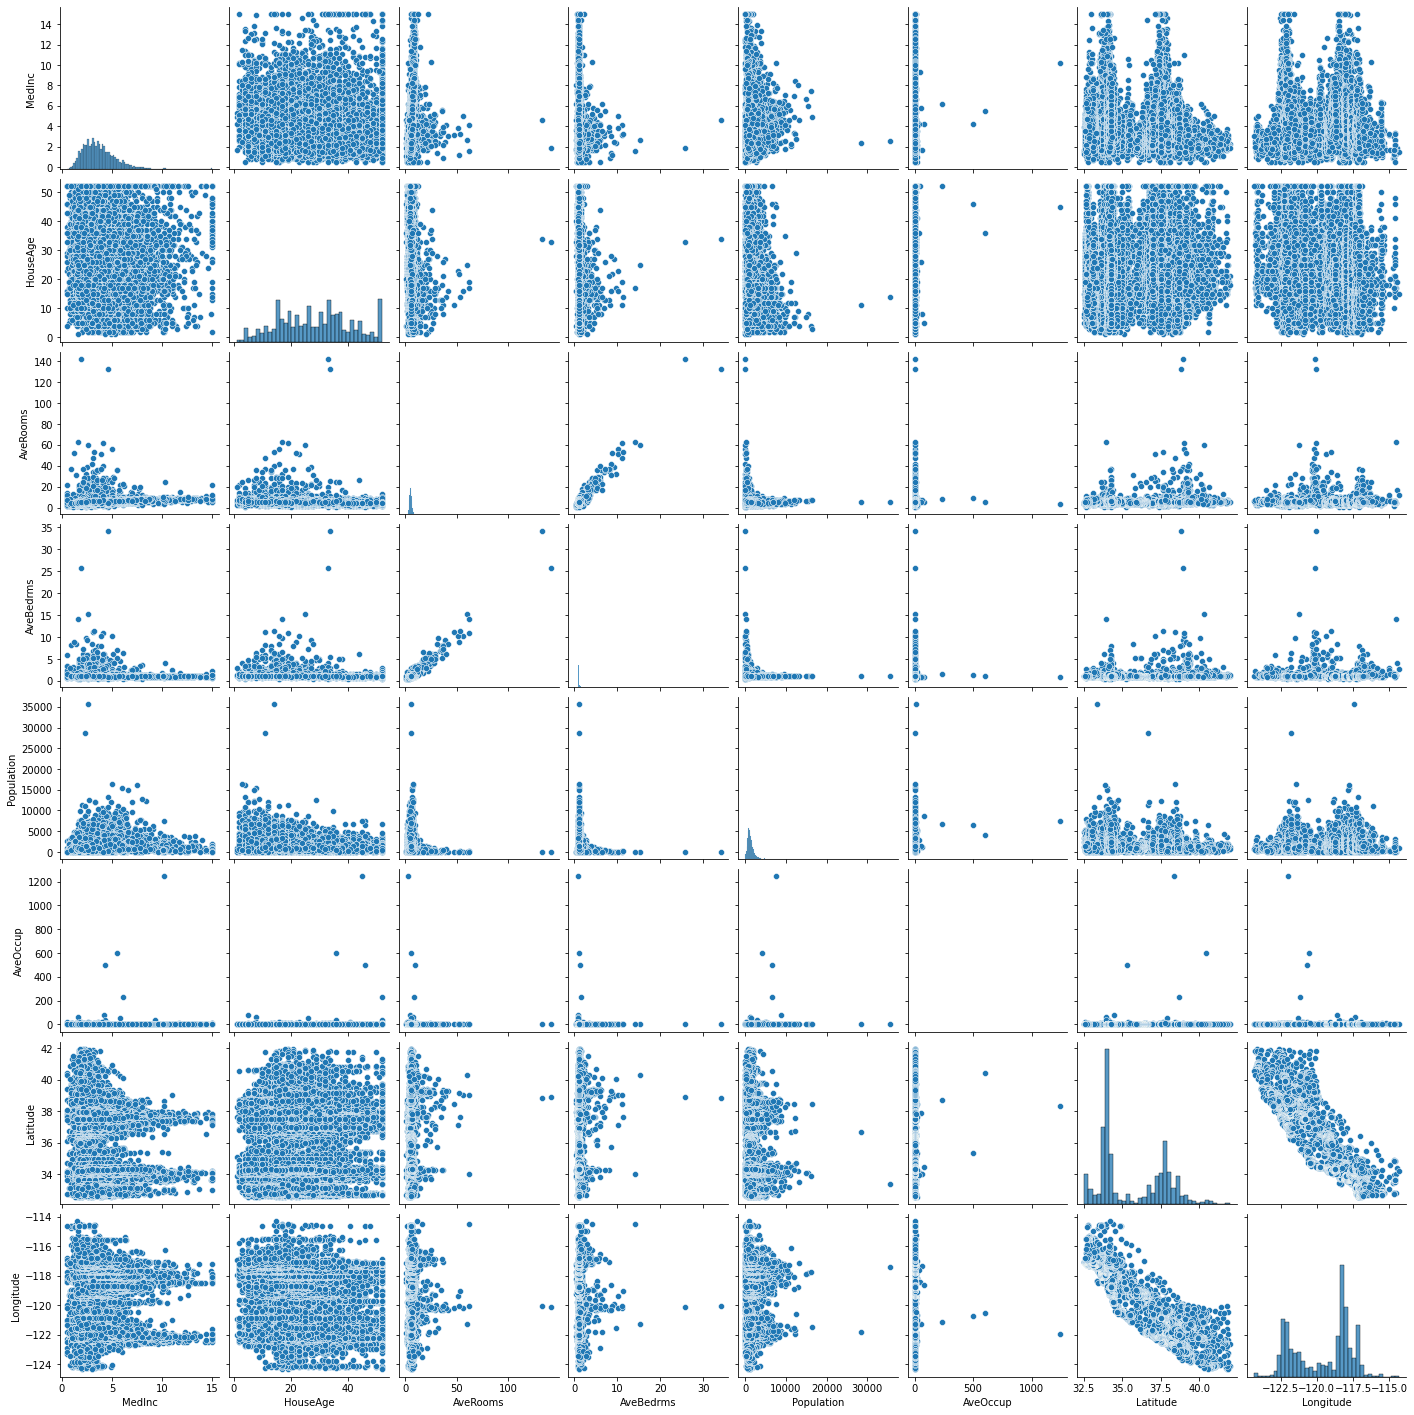

In [8]:
sns.pairplot(X)
plt.show()

# Interpretating by Coef

In [9]:
TEST_SIZE = 0.2
RANDOM_SEED = 2020
N_FOLD = 5

## without KFold

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

In [11]:
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

RMSE: 0.728970062384997
R^2: 0.6077878790093864


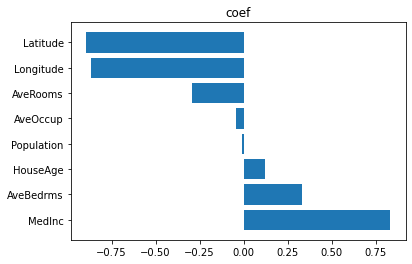

In [12]:
df_coef = pd.DataFrame({"columns": X.columns, "coef": lr.coef_.tolist()}).sort_values("coef", ascending=False)
plt.barh(width=list(df_coef["coef"]), y=df_coef["columns"])
plt.title(f"coef")
plt.show()

## with KFold

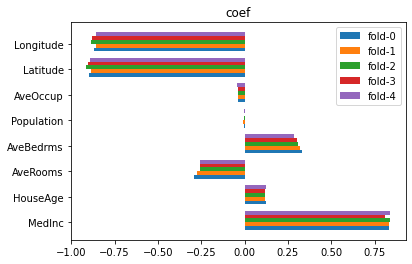

In [13]:
folds = KFold(n_splits=N_FOLD, shuffle=True, random_state=RANDOM_SEED)
fold_iter = folds.split(X, y=y)
height = 0.15
labels = X.columns
left = np.arange(len(labels), dtype=float) - height

for n_fold, (trn_idx, val_idx) in enumerate(fold_iter):
    X_train, X_valid = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_valid = y[trn_idx], y[val_idx]
    
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_valid_std = sc.transform(X_valid)

    lr = LinearRegression()
    lr.fit(X_train_std, y_train)

    y_pred = lr.predict(X_valid_std)
    
    bar = plt.barh(left, lr.coef_.tolist(), height=height, align='center', label=f"fold-{n_fold}")
    plt.bar_label(bar, label_type='center', fmt='')
    plt.legend()
    plt.title("coef")
    plt.yticks(left-(height*N_FOLD)/2, labels)

    left += height

plt.show()